# House Price Prediction

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

from ml_utils import utils

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')
X_train = df_train.drop(columns=['SalePrice'])
y_train = df_train['SalePrice']
X_test = df_test.copy()

## EDA

In [4]:
df_skim_train = utils.skim_data(df_train)
df_skim_train

Total duplicate rows: 0
DF shape: (1460, 81)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,Id,int64,0.000,0.0,0.0,1460,100.00,"[1, 2, 3, 4, 5]"
1,MSSubClass,int64,0.000,0.0,0.0,15,1.03,"[60, 20, 70, 50, 190]"
2,MSZoning,object,0.000,-,-,5,0.34,"[RL, RM, C (all), FV, RH]"
3,LotFrontage,float64,17.740,0.0,0.0,110,7.53,"[65.0, 80.0, 68.0, 60.0, 84.0]"
4,LotArea,int64,0.000,0.0,0.0,1073,73.49,"[8450, 9600, 11250, 9550, 14260]"
5,Street,object,0.000,-,-,2,0.14,"[Pave, Grvl]"
6,Alley,object,93.767,-,-,2,0.14,"[Grvl, Pave]"
7,LotShape,object,0.000,-,-,4,0.27,"[Reg, IR1, IR2, IR3]"
8,LandContour,object,0.000,-,-,4,0.27,"[Lvl, Bnk, Low, HLS]"
9,Utilities,object,0.000,-,-,2,0.14,"[AllPub, NoSeWa]"


In [5]:
df_skim_test = utils.skim_data(df_test)
df_skim_test

Total duplicate rows: 0
DF shape: (1459, 80)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,Id,int64,0.000,0.0,0.0,1459,100.00,"[1461, 1462, 1463, 1464, 1465]"
1,MSSubClass,int64,0.000,0.0,0.0,16,1.10,"[20, 60, 120, 160, 80]"
2,MSZoning,object,0.274,-,-,5,0.34,"[RH, RL, RM, FV, C (all)]"
3,LotFrontage,float64,15.559,0.0,0.0,115,7.88,"[80.0, 81.0, 74.0, 78.0, 43.0]"
4,LotArea,int64,0.000,0.0,0.0,1106,75.81,"[11622, 14267, 13830, 9978, 5005]"
5,Street,object,0.000,-,-,2,0.14,"[Pave, Grvl]"
6,Alley,object,92.666,-,-,2,0.14,"[Pave, Grvl]"
7,LotShape,object,0.000,-,-,4,0.27,"[Reg, IR1, IR2, IR3]"
8,LandContour,object,0.000,-,-,4,0.27,"[Lvl, HLS, Bnk, Low]"
9,Utilities,object,0.137,-,-,1,0.07,[AllPub]


The data shows that `id` is insignificant since it's a zero-variance feature and it's should be deleted later.

In [6]:
X_train = X_train.drop('Id', axis=1)
X_test = X_test.drop('Id', axis=1)

### Invalid Data

#### `GrLivArea` vs `LotArea`

In [7]:
# above ground living area sqft larger than lot area

X_train[X_train['GrLivArea'] > X_train['LotArea']]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [8]:
# above ground living area sqft larger than lot area

X_test[X_test['GrLivArea'] > X_test['LotArea']][['GrLivArea', 'LotArea']]

,GrLivArea,LotArea
278,3005,2880


In [9]:
def impute_invalid_liv_area(df):
    df_copy = df.copy()
    mask_invalid_year = df_copy['GrLivArea'] > df_copy['LotArea']
    df_copy.loc[mask_invalid_year, 'GrLivArea'] = df_copy.loc[mask_invalid_year, 'LotArea']
    return df_copy

X_train = impute_invalid_liv_area(X_train)
X_test = impute_invalid_liv_area(X_test)

In [10]:
# above ground living area sqft larger than lot area
# check on df_test

X_test[X_test['GrLivArea'] > X_test['LotArea']][['GrLivArea', 'LotArea']]

,GrLivArea,LotArea


#### `GarageYrBlt` vs `YearBuilt`

In [11]:
# garage built earlier than the resident itself

X_train[X_train['GarageYrBlt'] < X_train['YearBuilt']][['YearBuilt', 'GarageYrBlt']]

,YearBuilt,GarageYrBlt
29,1927,1920.0
93,1910,1900.0
324,1967,1961.0
600,2005,2003.0
736,1950,1949.0
1103,1959,1954.0
1376,1930,1925.0
1414,1923,1922.0
1418,1963,1962.0


In [12]:
# garage built earlier than the resident itself

X_test[X_test['GarageYrBlt'] < X_test['YearBuilt']][['YearBuilt', 'GarageYrBlt']]

,YearBuilt,GarageYrBlt
61,1959,1956.0
116,2010,2009.0
345,1935,1920.0
380,1978,1960.0
435,1941,1940.0
437,1935,1926.0
662,1945,1925.0
803,2006,2005.0
1049,2006,2005.0


In [13]:
def impute_invalid_year_blt(df):
    df_copy = df.copy()
    mask_invalid_year = df_copy['GarageYrBlt'] < df_copy['YearBuilt']
    df_copy.loc[mask_invalid_year, 'GarageYrBlt'] = df_copy.loc[mask_invalid_year, 'YearBuilt']
    return df_copy

X_train = impute_invalid_year_blt(X_train)
X_test = impute_invalid_year_blt(X_test)

In [14]:
# garage built earlier than the resident itself
# test on both dfs

print('df_train')
display(
    X_train[X_train['GarageYrBlt'] < X_train['YearBuilt']][['YearBuilt', 'GarageYrBlt']]
)
print('df_test')
display(
    X_test[X_test['GarageYrBlt'] < X_test['YearBuilt']][['YearBuilt', 'GarageYrBlt']]
)

df_train


,YearBuilt,GarageYrBlt


df_test


,YearBuilt,GarageYrBlt


#### `GarageType` vs all

In [15]:
(
    X_train[X_train['GarageType'].isna()]
    [['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


In [16]:
(
    X_test[X_test['GarageType'].isna()]
    [['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
71,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
92,NaN,NaN,NaN,0.0,0.0,NaN,NaN
96,NaN,NaN,NaN,0.0,0.0,NaN,NaN
98,NaN,NaN,NaN,0.0,0.0,NaN,NaN
100,NaN,NaN,NaN,0.0,0.0,NaN,NaN
130,NaN,NaN,NaN,0.0,0.0,NaN,NaN
133,NaN,NaN,NaN,0.0,0.0,NaN,NaN
134,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [17]:
def fillna_garage(df):
    df_copy = df.copy()
    no_garage_mask = df['GarageType'].isna()
    for feature in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        df_copy.loc[no_garage_mask, feature] = 'NA'
    df_copy.loc[no_garage_mask, 'GarageYrBlt'] = 0
    return df_copy

X_train = fillna_garage(X_train)
X_test = fillna_garage(X_test)

In [18]:
print('df_train')
display(
    X_train[X_train['GarageType'].isna()]
    [['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
)
print('df_test')
display(
    X_test[X_test['GarageType'].isna()]
    [['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
)

df_train


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond


df_test


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond


#### `TotalBsmtSF` vs all

In [19]:
(
    X_train[X_train['TotalBsmtSF'] <= 0]
    [['TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']]
)

,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
39,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
90,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
102,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
156,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
182,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
259,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
342,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
362,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
371,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0


In [20]:
(
    X_test[X_test['TotalBsmtSF'].isna()]
    [['TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']]
)

,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
(
    X_test[X_test['TotalBsmtSF'] <= 0]
    [['TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']]
)

,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
125,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
133,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
269,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
318,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
354,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
387,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
388,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
396,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
397,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
398,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0


In [22]:
def fillna_bsmt(df):
    df_copy = df.copy()
    df_copy['TotalBsmtSF'] = df_copy['TotalBsmtSF'].fillna(0)
    zero_bsmt_mask = df_copy['TotalBsmtSF'] <= 0
    for feature in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
        df_copy.loc[zero_bsmt_mask, feature] = 'NA'
    for feature in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']:
        df_copy.loc[zero_bsmt_mask, feature] = 0
    return df_copy

X_train = fillna_bsmt(X_train)
X_test = fillna_bsmt(X_test)

In [23]:
print('df_train')
display(
    X_train[X_train['TotalBsmtSF'] <= 0]
    [['TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']]
)
print('df_test')
display(
    X_test[X_test['TotalBsmtSF'] <= 0]
    [['TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']]
)

df_train


,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,0,NA,NA,NA,NA,0,NA,0,0,0,0
39,0,NA,NA,NA,NA,0,NA,0,0,0,0
90,0,NA,NA,NA,NA,0,NA,0,0,0,0
102,0,NA,NA,NA,NA,0,NA,0,0,0,0
156,0,NA,NA,NA,NA,0,NA,0,0,0,0
182,0,NA,NA,NA,NA,0,NA,0,0,0,0
259,0,NA,NA,NA,NA,0,NA,0,0,0,0
342,0,NA,NA,NA,NA,0,NA,0,0,0,0
362,0,NA,NA,NA,NA,0,NA,0,0,0,0
371,0,NA,NA,NA,NA,0,NA,0,0,0,0


df_test


,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
125,0.0,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0
133,0.0,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0
269,0.0,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0
318,0.0,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0
354,0.0,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0
387,0.0,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0
388,0.0,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0
396,0.0,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0
397,0.0,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0
398,0.0,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0


#### `Fireplaces` & `FireplaceQu`

In [24]:
(
    X_train[X_train['Fireplaces'] <= 0]
    [['Fireplaces', 'FireplaceQu']]
    .head()
)

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN


In [25]:
(
    X_test[X_test['Fireplaces'] <= 0]
    [['Fireplaces', 'FireplaceQu']]
    .head()
)

,Fireplaces,FireplaceQu
0,0,NaN
1,0,NaN
4,0,NaN
6,0,NaN
9,0,NaN


In [26]:
def fillna_fireplace(df):
    df_copy = df.copy()
    zero_fireplace_mask = df_copy['Fireplaces'] <= 0
    df_copy.loc[zero_fireplace_mask, 'FireplaceQu'] = 'NA'
    return df_copy

X_train = fillna_fireplace(X_train)
X_test = fillna_fireplace(X_test)

In [27]:
(
    X_train[X_train['Fireplaces'] <= 0]
    [['Fireplaces', 'FireplaceQu']]
    .head()
)

,Fireplaces,FireplaceQu
0,0,NA
5,0,NA
10,0,NA
12,0,NA
15,0,NA


In [28]:
(
    X_test[X_test['Fireplaces'] <= 0]
    [['Fireplaces', 'FireplaceQu']]
    .head()
)

,Fireplaces,FireplaceQu
0,0,NA
1,0,NA
4,0,NA
6,0,NA
9,0,NA


#### `PoolArea` & `PoolQC`

In [29]:
(
    X_train[X_train['PoolArea'] <= 0]
    [['PoolArea', 'PoolQC']]
    .head()
)

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [30]:
(
    X_test[X_test['PoolArea'] <= 0]
    [['PoolArea', 'PoolQC']]
    .head()
)

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [31]:
def fillna_pool(df):
    df_copy = df.copy()
    zero_fireplace_mask = df_copy['PoolArea'] <= 0
    df_copy.loc[zero_fireplace_mask, 'PoolQC'] = 'NA'
    return df_copy

X_train = fillna_pool(X_train)
X_test = fillna_pool(X_test)

#### `MasVnrArea` & `MasVnrType`

In [32]:
(
    X_train[X_train['MasVnrArea'] <= 0]
    [['MasVnrArea', 'MasVnrType']]
    .head()
)

,MasVnrArea,MasVnrType
1,0.0,NaN
3,0.0,NaN
5,0.0,NaN
8,0.0,NaN
9,0.0,NaN


In [33]:
def fillna_masonry(df):
    df_copy = df.copy()
    zero_masonry_area = df_copy['MasVnrArea'] <= 0
    df_copy.loc[zero_masonry_area, 'MasVnrType'] = 'NA'
    return df_copy

X_train = fillna_masonry(X_train)
X_test = fillna_masonry(X_test)

In [34]:
(
    X_train[X_train['MasVnrArea'] <= 0]
    [['MasVnrArea', 'MasVnrType']]
    .head()
)

,MasVnrArea,MasVnrType
1,0.0,NA
3,0.0,NA
5,0.0,NA
8,0.0,NA
9,0.0,NA


### Null Values

In [35]:
# check null values on train set

df_skim_train = utils.skim_data(X_train)
(
    df_skim_train
    .loc[lambda x: x['null_%'] > 0]
)

Total duplicate rows: 0
DF shape: (1460, 79)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
2,LotFrontage,float64,17.740,0.0,0.0,110,7.53,"[65.0, 80.0, 68.0, 60.0, 84.0]"
5,Alley,object,93.767,-,-,2,0.14,"[Grvl, Pave]"
24,MasVnrType,object,0.890,-,-,4,0.27,"[BrkFace, NA, Stone, BrkCmn]"
25,MasVnrArea,float64,0.548,0.0,58.973,327,22.40,"[196.0, 0.0, 162.0, 350.0, 186.0]"
31,BsmtExposure,object,0.068,-,-,5,0.34,"[No, Gd, Mn, Av, NA]"
34,BsmtFinType2,object,0.068,-,-,7,0.48,"[Unf, BLQ, NA, ALQ, Rec]"
41,Electrical,object,0.068,-,-,5,0.34,"[SBrkr, FuseF, FuseA, FuseP, Mix]"
72,Fence,object,80.753,-,-,4,0.27,"[MnPrv, GdWo, GdPrv, MnWw]"
73,MiscFeature,object,96.301,-,-,4,0.27,"[Shed, Gar2, Othr, TenC]"


In [36]:
# check null values on test set

df_skim_test = utils.skim_data(X_test)
(
    df_skim_test
    .loc[lambda x: x['null_%'] > 0]
    .sort_values('feature')
    .reset_index(drop=True)
)

Total duplicate rows: 0
DF shape: (1459, 79)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,Alley,object,92.666,-,-,2,0.14,"[Pave, Grvl]"
1,BsmtCond,object,0.206,-,-,5,0.34,"[TA, Po, Fa, Gd, NA]"
2,BsmtExposure,object,0.137,-,-,5,0.34,"[No, Gd, Mn, Av, NA]"
3,BsmtQual,object,0.137,-,-,5,0.34,"[TA, Gd, Ex, Fa, NA]"
4,Exterior1st,object,0.069,-,-,13,0.89,"[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd]"
5,Exterior2nd,object,0.069,-,-,15,1.03,"[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd]"
6,Fence,object,80.123,-,-,4,0.27,"[MnPrv, GdPrv, GdWo, MnWw]"
7,Functional,object,0.137,-,-,7,0.48,"[Typ, Min2, Min1, Mod, Maj1]"
8,GarageArea,float64,0.069,0.0,5.209,459,31.46,"[730.0, 312.0, 482.0, 470.0, 506.0]"
9,GarageCars,float64,0.069,0.0,5.209,6,0.41,"[1.0, 2.0, 3.0, 0.0, 4.0]"


#### Object-type features

In [37]:
(
    df_skim_train[(df_skim_train['dtype'] == 'object') & (df_skim_train['null_%'] > 0)]
)

,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
5,Alley,object,93.767,-,-,2,0.14,"[Grvl, Pave]"
24,MasVnrType,object,0.890,-,-,4,0.27,"[BrkFace, NA, Stone, BrkCmn]"
31,BsmtExposure,object,0.068,-,-,5,0.34,"[No, Gd, Mn, Av, NA]"
34,BsmtFinType2,object,0.068,-,-,7,0.48,"[Unf, BLQ, NA, ALQ, Rec]"
41,Electrical,object,0.068,-,-,5,0.34,"[SBrkr, FuseF, FuseA, FuseP, Mix]"
72,Fence,object,80.753,-,-,4,0.27,"[MnPrv, GdWo, GdPrv, MnWw]"
73,MiscFeature,object,96.301,-,-,4,0.27,"[Shed, Gar2, Othr, TenC]"


In [38]:
(
    df_skim_test[(df_skim_test['dtype'] == 'object') & (df_skim_test['null_%'] > 0)]
)

,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
1,MSZoning,object,0.274,-,-,5,0.34,"[RH, RL, RM, FV, C (all)]"
5,Alley,object,92.666,-,-,2,0.14,"[Pave, Grvl]"
8,Utilities,object,0.137,-,-,1,0.07,[AllPub]
22,Exterior1st,object,0.069,-,-,13,0.89,"[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd]"
23,Exterior2nd,object,0.069,-,-,15,1.03,"[VinylSd, Wd Sdng, HdBoard, Plywood, MetalSd]"
24,MasVnrType,object,1.234,-,-,4,0.27,"[NA, BrkFace, Stone, BrkCmn]"
29,BsmtQual,object,0.137,-,-,5,0.34,"[TA, Gd, Ex, Fa, NA]"
30,BsmtCond,object,0.206,-,-,5,0.34,"[TA, Po, Fa, Gd, NA]"
31,BsmtExposure,object,0.137,-,-,5,0.34,"[No, Gd, Mn, Av, NA]"
52,KitchenQual,object,0.069,-,-,4,0.27,"[TA, Gd, Ex, Fa]"


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

def impute_object_features(X_train, X_test):
    absent_null_features = [
        'Alley', 'Fence', 'MiscFeature',
    ]
    regular_null_features = [
        'MSZoning', 'MasVnrType', 'BsmtExposure', 'BsmtFinType2', 'Electrical',
        'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond',
        'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PoolQC', 'SaleType'
    ]
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()

    # handle absent null features
    X_train_copy[absent_null_features] = (
        X_train_copy[absent_null_features]
        .fillna('NA')
    )
    X_test_copy[absent_null_features] = (
        X_test_copy[absent_null_features]
        .fillna('NA')
    )

    # handle regular null features
    mode_imputer = SimpleImputer(strategy='most_frequent')
    transformer = ColumnTransformer(
        transformers=[
            ('cat', mode_imputer, regular_null_features)
        ],
        remainder='passthrough',
        verbose_feature_names_out=False,
        sparse_threshold=0
    )
    transformer.set_output(transform='pandas')
    transformer.fit(X_train)
    X_train_copy = transformer.transform(X_train_copy)
    X_test_copy = transformer.transform(X_test_copy)
    return X_train_copy, X_test_copy

X_train, X_test = impute_object_features(X_train, X_test)

In [40]:
(
    utils.skim_data(X_train)
    .loc[lambda x: x['null_%'] > 0]
)

Total duplicate rows: 0
DF shape: (1460, 79)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
18,LotFrontage,float64,17.740,0.0,0.0,110,7.53,"[65.0, 80.0, 68.0, 60.0, 84.0]"
37,MasVnrArea,float64,0.548,0.0,58.973,327,22.40,"[196.0, 0.0, 162.0, 350.0, 186.0]"


In [41]:
(
    utils.skim_data(X_test)
    .loc[lambda x: x['null_%'] > 0]
)

Total duplicate rows: 0
DF shape: (1459, 79)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
18,LotFrontage,float64,15.559,0.0,0.0,115,7.88,"[80.0, 81.0, 74.0, 78.0, 43.0]"
37,MasVnrArea,float64,1.028,0.0,60.11,303,20.77,"[0.0, 108.0, 20.0, 504.0, 492.0]"
63,GarageYrBlt,float64,0.137,0.0,5.209,98,6.72,"[1961.0, 1958.0, 1997.0, 1998.0, 1992.0]"
64,GarageCars,float64,0.069,0.0,5.209,6,0.41,"[1.0, 2.0, 3.0, 0.0, 4.0]"
65,GarageArea,float64,0.069,0.0,5.209,459,31.46,"[730.0, 312.0, 482.0, 470.0, 506.0]"


#### Numeric-type Features

In [42]:
def impute_numeric_features(X_train, X_test):
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    numerical_features = X_train_copy.select_dtypes(include=np.number).columns.tolist()

    # skewness detection
    skewness_series = (
        X_train_copy[numerical_features]
        .skew()
        .sort_values(ascending=False)
    )
    skew_threshold = 0.25
    mean_imputation = skewness_series[abs(skewness_series) < skew_threshold].index.tolist()
    median_imputation = skewness_series[abs(skewness_series) >= skew_threshold].index.tolist()

    # define imputers
    mean_imputer = SimpleImputer(strategy='mean')
    median_imputer = SimpleImputer(strategy='median')
    transformer = ColumnTransformer(
        transformers=[
            ('mean', mean_imputer, mean_imputation),
            ('median', median_imputer, median_imputation)
        ],
        remainder='passthrough',
        verbose_feature_names_out=False,
        sparse_threshold=0
    )
    transformer.set_output(transform='pandas')
    X_train_copy = transformer.fit_transform(X_train_copy)
    X_test_copy = transformer.transform(X_test_copy)
    return X_train_copy, X_test_copy

X_train, X_test = impute_numeric_features(X_train, X_test)

In [43]:
(
    utils.skim_data(X_train)
    .loc[lambda x: x['null_%'] > 0]
)

Total duplicate rows: 0
DF shape: (1460, 79)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values


In [44]:
(
    utils.skim_data(X_test)
    .loc[lambda x: x['null_%'] > 0]
)

Total duplicate rows: 0
DF shape: (1459, 79)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values


In [45]:
utils.skim_data(X_train)

Total duplicate rows: 0
DF shape: (1460, 79)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,OverallQual,float64,0.0,0.0,0.0,10,0.68,"[7.0, 6.0, 8.0, 5.0, 9.0]"
1,MoSold,float64,0.0,0.0,0.0,12,0.82,"[2.0, 5.0, 9.0, 12.0, 10.0]"
2,BedroomAbvGr,float64,0.0,0.0,0.411,8,0.55,"[3.0, 4.0, 1.0, 2.0, 0.0]"
3,GarageArea,float64,0.0,0.0,5.548,441,30.21,"[548.0, 460.0, 608.0, 642.0, 836.0]"
4,YrSold,float64,0.0,0.0,0.0,5,0.34,"[2008.0, 2007.0, 2006.0, 2009.0, 2010.0]"
5,FullBath,float64,0.0,0.0,0.616,4,0.27,"[2.0, 1.0, 3.0, 0.0]"
6,MiscVal,float64,0.0,0.0,96.438,21,1.44,"[0.0, 700.0, 350.0, 500.0, 400.0]"
7,PoolArea,float64,0.0,0.0,99.521,8,0.55,"[0.0, 512.0, 648.0, 576.0, 555.0]"
8,LotArea,float64,0.0,0.0,0.0,1073,73.49,"[8450.0, 9600.0, 11250.0, 9550.0, 14260.0]"
9,3SsnPorch,float64,0.0,0.0,98.356,20,1.37,"[0.0, 320.0, 407.0, 130.0, 180.0]"


In [46]:
utils.skim_data(X_test)

Total duplicate rows: 0
DF shape: (1459, 79)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,OverallQual,float64,0.0,0.0,0.0,10,0.69,"[5.0, 6.0, 8.0, 7.0, 4.0]"
1,MoSold,float64,0.0,0.0,0.0,12,0.82,"[6.0, 3.0, 1.0, 4.0, 5.0]"
2,BedroomAbvGr,float64,0.0,0.0,0.137,7,0.48,"[2.0, 3.0, 4.0, 1.0, 6.0]"
3,GarageArea,float64,0.0,0.0,5.209,460,31.53,"[730.0, 312.0, 482.0, 470.0, 506.0]"
4,YrSold,float64,0.0,0.0,0.0,5,0.34,"[2010.0, 2009.0, 2008.0, 2007.0, 2006.0]"
5,FullBath,float64,0.0,0.0,0.206,5,0.34,"[1.0, 2.0, 3.0, 4.0, 0.0]"
6,MiscVal,float64,0.0,0.0,96.504,26,1.78,"[0.0, 12500.0, 500.0, 1500.0, 300.0]"
7,PoolArea,float64,0.0,0.0,99.589,7,0.48,"[0.0, 144.0, 368.0, 444.0, 228.0]"
8,LotArea,float64,0.0,0.0,0.0,1106,75.81,"[11622.0, 14267.0, 13830.0, 9978.0, 5005.0]"
9,3SsnPorch,float64,0.0,0.0,99.109,13,0.89,"[0.0, 224.0, 255.0, 225.0, 360.0]"


### Linearity Assessment

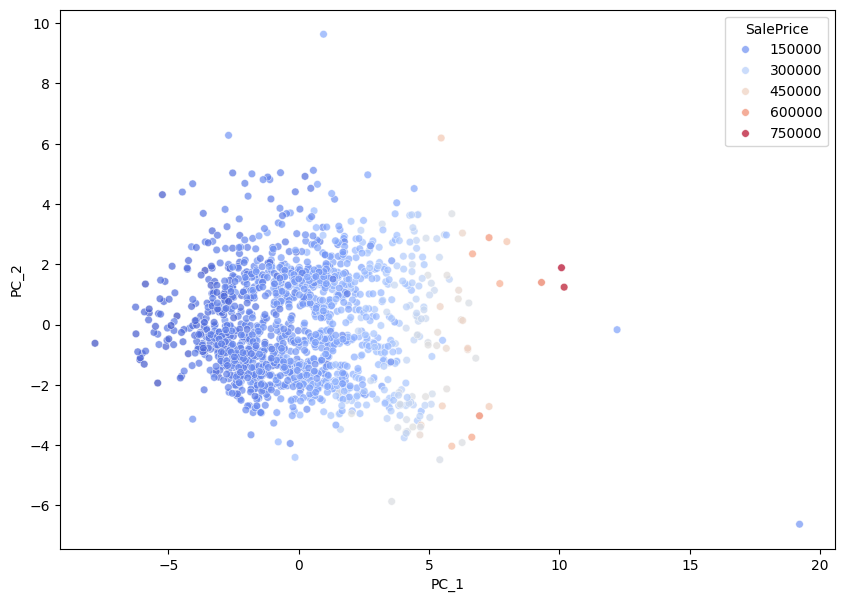

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def assess_linearity(X, y):
    features = X.copy()
    target = y.copy()
    num_features = features.select_dtypes(np.number).columns.to_list()
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features[num_features])
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features_scaled)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC_1', 'PC_2'])
    pca_df['SalePrice'] = target.values

    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data=pca_df,
        x='PC_1',
        y='PC_2',
        hue='SalePrice',
        palette='coolwarm',
        s=30,
        alpha=0.7
    )
    plt.show()

assess_linearity(X_train, y_train)

## Model Training

### Linear Model

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

class GroupedOHETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=6, top_n=5):
        self.threshold = threshold
        self.top_n = top_n
        self.feature_list_ = []
        self.top_categories_ = {}

    def fit(self, X, y=None):
        self.feature_list_ = [
            col for col in X.select_dtypes(exclude=[np.number]).columns
            if X[col].nunique() > self.threshold
        ]
        for col in self.feature_list_:
            self.top_categories_[col] = (
                X[col].value_counts(normalize=True).nlargest(self.top_n)
                .index.tolist()
            )
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.feature_list_:
            top_5 = self.top_categories_.get(col)
            if top_5:
                X_copy.loc[~X_copy[col].isin(top_5), col] = 'Other'
        return X_copy

    def set_output(self, *, transform=None):
        self._transform_output = transform
        return self


In [70]:
def test_grouped_ohe():
    df_temp = X_train.copy()
    grouped_ohe = GroupedOHETransformer()
    df_temp = grouped_ohe.fit_transform(df_temp)
    display(utils.skim_data(df_temp))

test_grouped_ohe()

Total duplicate rows: 0
DF shape: (1460, 79)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,OverallQual,float64,0.0,0.0,0.0,10,0.68,"[7.0, 6.0, 8.0, 5.0, 9.0]"
1,MoSold,float64,0.0,0.0,0.0,12,0.82,"[2.0, 5.0, 9.0, 12.0, 10.0]"
2,BedroomAbvGr,float64,0.0,0.0,0.411,8,0.55,"[3.0, 4.0, 1.0, 2.0, 0.0]"
3,GarageArea,float64,0.0,0.0,5.548,441,30.21,"[548.0, 460.0, 608.0, 642.0, 836.0]"
4,YrSold,float64,0.0,0.0,0.0,5,0.34,"[2008.0, 2007.0, 2006.0, 2009.0, 2010.0]"
5,FullBath,float64,0.0,0.0,0.616,4,0.27,"[2.0, 1.0, 3.0, 0.0]"
6,MiscVal,float64,0.0,0.0,96.438,21,1.44,"[0.0, 700.0, 350.0, 500.0, 400.0]"
7,PoolArea,float64,0.0,0.0,99.521,8,0.55,"[0.0, 512.0, 648.0, 576.0, 555.0]"
8,LotArea,float64,0.0,0.0,0.0,1073,73.49,"[8450.0, 9600.0, 11250.0, 9550.0, 14260.0]"
9,3SsnPorch,float64,0.0,0.0,98.356,20,1.37,"[0.0, 320.0, 407.0, 130.0, 180.0]"


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

# StandardScaler for numerical features
# Grouped OHE for categorical features for features with nunique larger than threshold
# OHE all categorical features

def train_linear_model(X_train: pd.DataFrame, y_train):
    num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
    cat_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
    prep_cols = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_features),
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features)
        ],
        remainder='passthrough'
    )
    preprocessing = Pipeline(
        steps=[
            ('grouped_ohe', GroupedOHETransformer()),
            ('features', prep_cols)
        ]
    )
    main_pipeline = Pipeline(
        steps=[
            ('preprocessing', preprocessing),
            ('regressor', Ridge(random_state=29))
        ]
    )
    param_grid = {
        'preprocessing__grouped_ohe__threshold': [3, 4, 6],
        'preprocessing__grouped_ohe__top_n': [3, 5],
        'regressor': [Ridge(random_state=29), Lasso(random_state=29)],
        'regressor__alpha': [0.01, 0.1, 1.0, 10, 100],
        'regressor__max_iter': [100000]
    }
    random_search = RandomizedSearchCV(
        estimator=main_pipeline,
        param_distributions=param_grid,
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=4,
        verbose=1,
        return_train_score=True,
        random_state=29
    )
    random_search.fit(X_train, y_train)
    print('Training complete!')
    print(random_search.best_params_)
    return random_search

linear_rs = train_linear_model(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.541e+10, tolerance: 6.237e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.996e+10, tolerance: 5.906e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

Training complete!
{'regressor__max_iter': 100000, 'regressor__alpha': 100, 'regressor': Lasso(random_state=29), 'preprocessing__grouped_ohe__top_n': 3, 'preprocessing__grouped_ohe__threshold': 3}


In [57]:
def create_submission(estimator):
    y_pred = estimator.predict(X_test)
    df_submission = pd.DataFrame({
        'Id': df_test['Id'],
        'SalePrice': y_pred
    })
    timestamp = utils.get_time()
    df_submission.to_csv(f'input/submission_{timestamp}.csv', index=False)

create_submission(linear_rs.best_estimator_)

Kaggle submission score for linear model: 0.14966

### Ensemble Model

In [59]:
from sklearn.preprocessing import TargetEncoder
from sklearn.ensemble import RandomForestRegressor

def train_ensemble_model(X_train: pd.DataFrame, y_train):
    num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
    cat_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
    preprocessing = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_features),
            ('cat', TargetEncoder(target_type='auto', smooth='auto'), cat_features)
        ],
        remainder='passthrough'
    )
    main_pipeline = Pipeline(
        steps=[
            ('preprocessing', preprocessing),
            ('regressor', RandomForestRegressor(random_state=29))
        ]
    )
    param_grid = {
        'regressor__n_estimators': [100, 250, 500, 1000],
        'regressor__max_depth': [None, 5, 7, 10],
        'regressor__min_samples_split': [2, 4, 6, 8],
        'regressor__min_samples_leaf': [1, 3, 5, 7]
    }
    random_search = RandomizedSearchCV(
        estimator=main_pipeline,
        param_distributions=param_grid,
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=4,
        verbose=1,
        return_train_score=True,
        random_state=29
    )
    random_search.fit(X_train, y_train)
    print('Training complete!')
    print(random_search.best_params_)
    return random_search

ensemble_rs = train_ensemble_model(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python

Training complete!
{'regressor__n_estimators': 1000, 'regressor__min_samples_split': 4, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': 10}


In [60]:
create_submission(ensemble_rs.best_estimator_)

Kaggle submission score for RandomForest: 0.15497.

## Model Explainability

--- SHAP Analysis for Linear Model ---


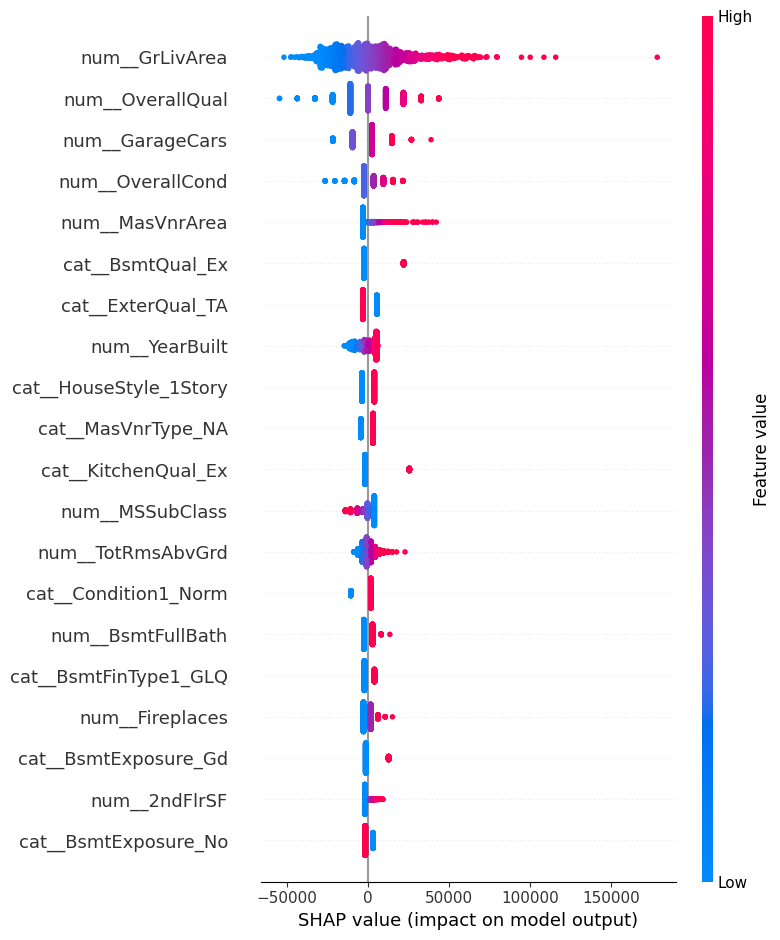

In [72]:
import shap

def linear_shap(pipeline, X_train, X_test):
    preprocessing = Pipeline(steps=[
        ('grouped_ohe', pipeline.named_steps['preprocessing'].named_steps['grouped_ohe']),
        ('features', pipeline.named_steps['preprocessing'].named_steps['features'])
    ])
    preprocessing.set_output(transform='pandas')
    X_train_processed = preprocessing.transform(X_train)
    X_test_processed = preprocessing.transform(X_test)

    estimator = pipeline.named_steps['regressor']
    explainer = shap.LinearExplainer(estimator, X_train_processed)
    shap_values = explainer.shap_values(X_test_processed)

    print('--- SHAP Analysis for Linear Model ---')
    shap.summary_plot(shap_values, X_test_processed)

linear_shap(linear_rs.best_estimator_, X_train, X_test)

--- SHAP Analysis for Ensemble Model ---


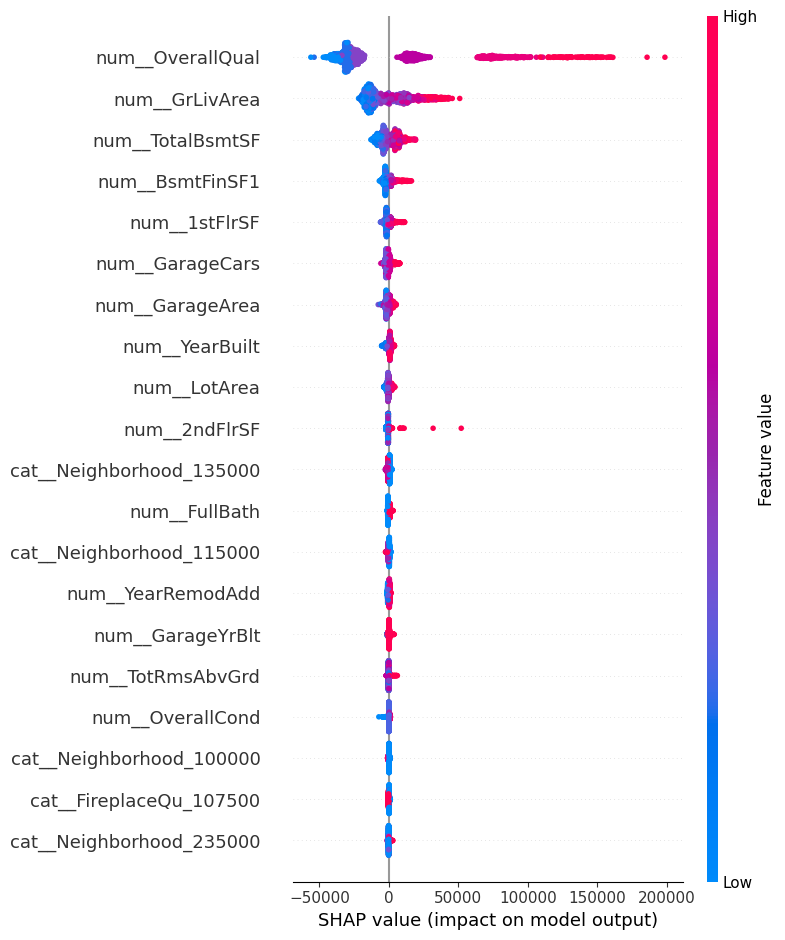

In [75]:
def ensemble_shap(pipeline, X_test):
    preprocessing = pipeline.named_steps['preprocessing']
    preprocessing.set_output(transform='pandas')
    X_test_processed = preprocessing.transform(X_test)

    estimator = pipeline.named_steps['regressor']
    explainer = shap.TreeExplainer(estimator)
    shap_values = explainer.shap_values(X_test_processed)

    print('--- SHAP Analysis for Ensemble Model ---')
    shap.summary_plot(shap_values, X_test_processed)

ensemble_shap(ensemble_rs.best_estimator_, X_test)